In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\ML Projects\heart disease\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#printing the five rows where target is equal to 1
df[df.target==1].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [5]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

# Splitting the data

In [6]:
X = df.drop(['target'], axis = 'columns')
y = df.target

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

In [8]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,stratify=y,random_state=200)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import classification_report
testpred= dtree.predict(X_test)
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [19]:
#print('the f1 score is', f1_score(y_test,testpred))

the f1 score is 1.0


# Using cross validation

In [22]:
scores= cross_val_score(dtree, X_train,y_train, cv=5, scoring='f1_macro')
scores.mean()

0.975239195010213

In [23]:
scores1= cross_val_score(dtree, X_test,y_test, cv=5, scoring='f1_macro')
scores1.mean()

0.8435728557825488

[Text(0.49816176470588236, 0.95, 'X[2] <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [374, 394]'),
 Text(0.28125, 0.85, 'X[11] <= 0.5\ngini = 0.388\nsamples = 387\nvalue = [285, 102]'),
 Text(0.1875, 0.75, 'X[12] <= 2.5\ngini = 0.5\nsamples = 174\nvalue = [86, 88]'),
 Text(0.09558823529411764, 0.65, 'X[8] <= 0.5\ngini = 0.398\nsamples = 102\nvalue = [28, 74]'),
 Text(0.058823529411764705, 0.55, 'X[4] <= 316.5\ngini = 0.168\nsamples = 65\nvalue = [6, 59]'),
 Text(0.029411764705882353, 0.45, 'X[7] <= 96.5\ngini = 0.067\nsamples = 58\nvalue = [2, 56]'),
 Text(0.014705882352941176, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.04411764705882353, 0.35, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.08823529411764706, 0.45, 'X[4] <= 362.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.07352941176470588, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.10294117647058823, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1323529411764706, 0.55, 'X[6] <= 0

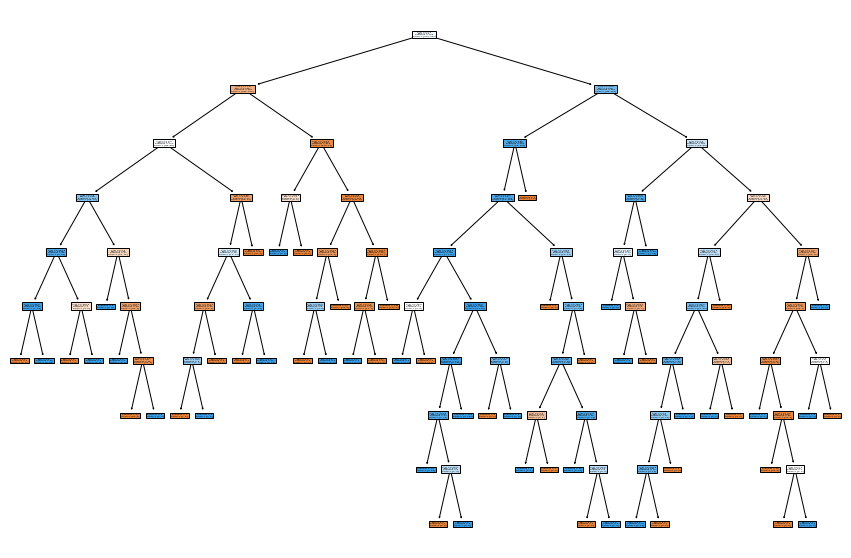

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

# Random Forest

# Post Prunning

#-When we are constructing a decision tree  its complete depth this leads to overfitting, To prevent overfitting we need to give/find values  to parameters like min_samples_leaf and Max_depth 

In [31]:
#dir(dtree)

In [32]:
path = dtree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities =path.ccp_alphas, path.impurities

In [33]:
dtree1=[]
for ccp_alpha in ccp_alphas:
    dtree=DecisionTreeClassifier(random_state=200, ccp_alpha=ccp_alpha)
    dtree.fit(X_train,y_train)
    dtree1.append(dtree)
#print('Number of nodes in last tree is : {} with ccp_alpha: {}'.format(dtree1[-1].tree_.node_count, ccp_alpha[-1]))

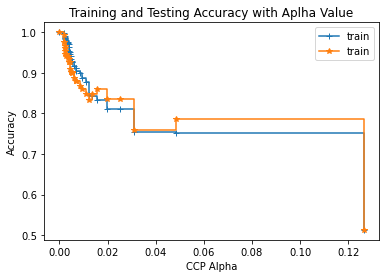

In [34]:
#clfs=dtree1
train_score =[dtree.score(X_train,y_train) for dtree in dtree1]
test_score= [dtree.score(X_test,y_test) for dtree in dtree1]


fig, ax= plt.subplots()
ax.set_xlabel('CCP Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy with Aplha Value')
ax.plot(ccp_alphas, train_score, label='train',marker='+' ,drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, label='train',marker='*', drawstyle='steps-post')
ax.legend()
plt.show()

# Finding the best model parameters using randomized_search

In [35]:
parameters = { 'max_depth': (5,6,7,8,9,10,11),
              'criterion': ('gini', 'entropy'),
              'max_features': ('auto','log2','sqrt'),
              'min_samples_split': (1,2,3,4,5,6,7,8,9,10),
              'min_samples_leaf': (1,2,3,4,5,6,7,8,9,10)
}
scorer=make_scorer(f1_score)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
bestdtree=GridSearchCV(DecisionTreeClassifier(), param_grid=parameters,cv=5,scoring=scorer) 

In [38]:
bestdtree.fit(X_train,y_train)

C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (5, 6, 7, 8, 9, 10, 11),
                         'max_features': ('auto', 'log2', 'sqrt'),
                         'min_samples_leaf': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
                         'min_samples_split': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
             scoring=make_scorer(f1_score))

In [39]:
bestdtree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [54]:
#now wee found out max_depth 8 is good i guess, lets use these hyperparameters
dtree1= DecisionTreeClassifier(ccp_alpha=0.02,
 class_weight= None,
 criterion='entropy',
 max_depth= 11,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf=1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter='best')

In [55]:
dtree1.fit(X_train,y_train)

C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=11,
                       max_features='auto')

In [56]:
dtree1.score(X_train,y_train)

0.8359375

In [57]:
from sklearn.metrics import accuracy_score
X_train_pred= dtree1.predict(X_train)
train_acc= accuracy_score(X_train_pred, y_train)
print(train_acc)

0.8359375


In [58]:
y_Pred=dtree1.predict(X_test)

In [59]:
print('the F1_score is',f1_score(y_Pred,y_test))

the F1_score is 0.8352490421455938


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.84      0.83      0.84       132

    accuracy                           0.83       257
   macro avg       0.83      0.83      0.83       257
weighted avg       0.83      0.83      0.83       257



# Making Predictions

In [74]:
input_data = (29,1,2,139,303,1,0,177,1,3.9,1,3,3)

#changing the input data into numpy array
input_data_np= np.asarray(input_data)

#reshape the array as we are predicting for one
input_reshaped = input_data_np.reshape(1,-1)

prediction = dtree1.predict(input_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Person Doesnt have Heart Disease')
    
else:
    print('The Person Have Heart Disease')
            

[0]
The Person Doesnt have Heart Disease


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [75]:
import pickle 

In [79]:
filename = 'dt_trained.sav'
pickle.dump(dtree1,open(filename, 'wb'))

In [80]:
#how to load and using saved model
#rb-reading the binary formatted files
loaded_model = pickle.load(open('dt_trained.sav','rb'))

In [82]:
input_data = (29,1,2,139,303,1,0,177,1,3.9,1,3,3)

#changing the input data into numpy array
input_data_np= np.asarray(input_data)

#reshape the array as we are predicting for one
input_reshaped = input_data_np.reshape(1,-1)

prediction = loaded_model.predict(input_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Person Doesnt have Heart Disease')
    
else:
    print('The Person Have Heart Disease')

[0]
The Person Doesnt have Heart Disease


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
